# Project: Build Deep Learning Model to recognize handwritten digits

## Objective 
- recognize handwritten digit by using deep learning models 
- understand CNN model and its implementation 
- get high accuracy and train model from end to end

## Introduction 

- explain about dataset 
- framework to use: Keras 
- model to use 
- language

## Results

- accuracy for each model 
- MLP solution
   - input 
   - output 
   - train accurary 
   - test accuracy 
- CNN solution 



## Conclusion 

# Load Dataset

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_data, train_label), (test_data, test_label) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data.shape 

(60000, 28, 28)

In [ ]:
train_label.shape 

(60000,)

In [ ]:
test_data.shape 

(10000, 28, 28)

In [ ]:
test_label.shape 

(10000,)

## Summary of dataset 

Training set 
- 60k images
- shape 28x28
- label is from 0 to 9


Test set
- 10k images 
- shape 28x28
- label is from 0 to 9

## Visualization 

Print image out using matplotlib library 

In [ ]:
import matplotlib.pyplot as plt
# print in gray scale 
plt.gray()

<Figure size 432x288 with 0 Axes>

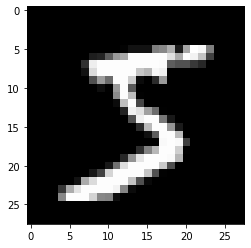

In [ ]:
plt.imshow(train_data[0])

In [ ]:
train_label[0]

5

# MLP Solution

Define the model 

- input: column vector of 784 entries (expand from 28x28 image matrix)
- 1st hidden layer with size of 512 
- activation function = relu 
- output layer of size 10 with softmax to get probability 


In [ ]:
from keras import models
from keras import layers 

In [ ]:
model_mlp = models.Sequential()

In [ ]:
model_mlp.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))


In [ ]:
model_mlp.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optimizer function 

model_mlp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Transform dataset

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
mlp_train_data = train_data.reshape(60000, 28*28)

In [ ]:
type(mlp_train_data[0][350])

numpy.uint8

In [ ]:
mlp_train_data[0][350]

0.27450982

In [ ]:
mlp_train_data = mlp_train_data.astype('float32') / 255

In [ ]:
mlp_train_data[0][350]

0.27450982

In [ ]:
mlp_test_data = test_data.reshape(10000,28*28)
mlp_test_data = mlp_test_data.astype('float32') / 255

## Transform label

In [ ]:
train_label[0]

5

In [ ]:
from keras.utils import to_categorical

In [ ]:

mlp_train_label = to_categorical(train_label)

In [ ]:
mlp_train_label[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
mlp_test_label = to_categorical(test_label)

# Train Model 

In [ ]:
model_mlp.fit(mlp_train_data, mlp_train_label, epochs = 5, batch_size = 120)


Epoch 1/5
500/500 [==============================] - 5s 10ms/step - loss: 0.2549 - accuracy: 0.9257
Epoch 2/5
500/500 [==============================] - 5s 10ms/step - loss: 0.1017 - accuracy: 0.9699
Epoch 3/5
500/500 [==============================] - 6s 12ms/step - loss: 0.0672 - accuracy: 0.9794
Epoch 4/5
500/500 [==============================] - 6s 12ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 5/5
500/500 [==============================] - 6s 12ms/step - loss: 0.0368 - accuracy: 0.9890


Training accuracy of $~98.9\%$

In [ ]:
mlp_test_loss, mlp_test_acc = model_mlp.evaluate(mlp_test_data, mlp_test_label)

313/313 [==============================] - 2s 5ms/step - loss: 0.0628 - accuracy: 0.9815


In [ ]:
print('test accuracy:', (mlp_test_acc*100))

test accuracy: 98.15000295639038


# CNN Solution

In [ ]:
from keras import models
from keras import layers

In [ ]:
model_cnn = models.Sequential()

## Archtecture 

- 2 dimensional Convolution Layer
- Number of filters/kernels = 32
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)
- Input Shape = 28x28 matrix with 1 channel (as image is gray scale, we have only 1 channel)


First Conv2D Details:

- Downsample the output from previous layer
- We will take the max value for a every 2x2 window ... moved over the input


MaxPool2D Details:
- 2 dimensional Convolution Layer
- Number of filters/kernels = 64
- Filter/Kernel Size = 3x3
- Activation Function = relu (for non-linearity detection)

2nd Conv2D details:
- Downsample the output from previous layer
- We will take the max value for a every 2x2 window ... moved over the input

In [ ]:
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(layers.MaxPooling2D(2,2))
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model_cnn.add(layers.MaxPooling2D(2,2))
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(64, activation = 'relu'))
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)         

In [ ]:
train_data.shape 

(60000, 28, 28)

In [ ]:
cnn_train_data = train_data.reshape(60000, 28, 28, 1)
cnn_test_data = test_data.reshape(10000, 28, 28, 1)

In [ ]:
cnn_train_data.shape

(60000, 28, 28, 1)

In [ ]:
cnn_train_data = cnn_train_data.astype('float32') / 255
cnn_test_data = cnn_test_data.astype('float32') / 255

In [ ]:
cnn_train_label = to_categorical(train_label)
cnn_test_label = to_categorical(test_label)

In [ ]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model_cnn.fit(cnn_train_data, cnn_train_label, epochs = 5, batch_size = 60)

Epoch 1/5
1000/1000 [==============================] - 142s 141ms/step - loss: 0.1521 - accuracy: 0.9529
Epoch 2/5
1000/1000 [==============================] - 122s 122ms/step - loss: 0.0417 - accuracy: 0.9872
Epoch 3/5
1000/1000 [==============================] - 125s 125ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 4/5
1000/1000 [==============================] - 126s 126ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 5/5
1000/1000 [==============================] - 134s 134ms/step - loss: 0.0183 - accuracy: 0.9944


we got a training accuracy of $99.4\%$

In [ ]:
cnn_test_loss, cnn_test_acc = model_cnn.evaluate(cnn_test_data, cnn_test_label)

313/313 [==============================] - 6s 19ms/step - loss: 0.0276 - accuracy: 0.9915


we got a test accuracy of  $99.15\%$

# Experiment on real data 

In [ ]:
from PIL import Image
import numpy as np 

In [ ]:
image = Image.open('2.jpg')

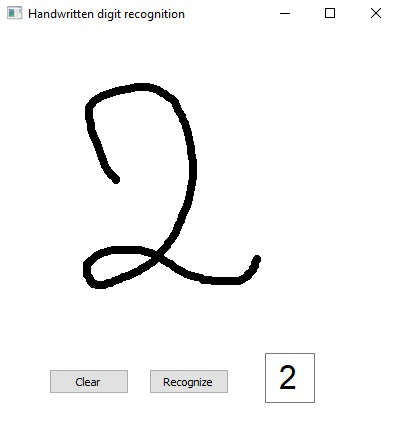

In [ ]:
image

In [ ]:
image = np.array(image)
image.shape 

(428, 398, 3)

In [ ]:
# trimming image 
im_trim = image[30:350, 30:350]
print("After trimming:",im_trim.shape)

Image.fromarray(im_trim).save('2_trim.jpeg')

After trimming: (320, 320, 3)


In [ ]:

im = np.array(Image.fromarray(im_trim).resize((28,28)).convert('L'))

In [ ]:
im.shape

(28, 28)

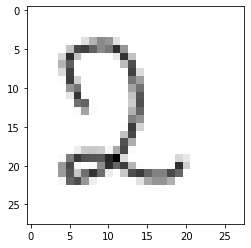

In [ ]:
plt.imshow(im)

In [ ]:
im = im.astype('float32') / 255

In [ ]:
im[np.newaxis, ..., np.newaxis].shape 

(1, 28, 28, 1)

In [ ]:
out = model_cnn.predict(im[np.newaxis, ..., np.newaxis])

1/1 [==============================] - 0s 25ms/step


In [ ]:
out 

array([[0.22399606, 0.27709663, 0.08779936, 0.1060783 , 0.06707843,
        0.12856126, 0.04558018, 0.00611313, 0.02860948, 0.02908713]],
      dtype=float32)

In [ ]:
np.argmax(out)

1